<a href="https://colab.research.google.com/github/NevadaM/DCAI_ODI0524/blob/main/DCAI_project_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q datasets transformers huggingface-hub
!pip install -q --force-reinstall 'pyarrow<15.0.0a0,>=14.0.1'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import random

np.random.seed(11)
tf.random.set_seed(11)

# LLM TESTING

model: pre-trained imported with hf transformers tf, then fine tuned on TOFU dataset from hf datasets, then forgetting 5% of dataset with GA above, then evaluating using hf evaluators

https://keras.io/examples/nlp/question_answering/



In [16]:
from transformers import AutoTokenizer, TFAutoModelForCausalLM
from datasets import load_dataset

from google.colab import userdata
# userdata.get('hf_key')

model_name = "facebook/opt-125m"
dataset_name = 'locuslab/TOFU'

In [17]:
dataset = load_dataset(dataset_name)

In [18]:
tokenizer = AutoTokenizer.from_pretrained(model_name)#, padding_side='left')

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

In [19]:
tokenizer.pad_token

'<pad>'

In [ ]:
# max_length = 60
# stride = 128

In [8]:
# def prepare_qa(data):
#   te = tokenizer(text=data['question'],
#                 text_target=data['answer'],
#                 max_length=max_length,
#                 truncation=True,
#                 padding="max_length",
#                 return_tensors='tf'
#               )
#   return te

def tokenize_function_features(examples):
    return tokenizer(
        text=examples["question"], #CHANGE WITH DIFFERENT DATASET
        text_target=examples["answer"], #CHANGE WITH DIFFERENT DATASET
        truncation=True,
        padding='max_length',
        max_length=250,
        return_tensors="tf"
    )



In [20]:
tokenized_datasets = dataset.map(tokenize_function_features, batched=True)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

In [21]:
# def create_tf_dataset(tokenized_dataset, batch_size=16):
#     """
#     Converts a Hugging Face Dataset to a TensorFlow Dataset, separating input_ids and labels.
#     """

#     def gen():
#         for example in tokenized_dataset:
#             yield example['input_ids'], example['labels']

#     tf_dataset = tf.data.Dataset.from_generator(
#         gen,
#         output_signature=(
#             tf.TensorSpec(shape=(None,), dtype=tf.int32),  # input_ids
#             tf.TensorSpec(shape=(None,), dtype=tf.int32)   # labels
#         )
#     )

#     # Batch and shuffle the dataset
#     tf_dataset = tf_dataset.batch(batch_size).shuffle(buffer_size=100)
#     return tf_dataset

# # Create TensorFlow datasets
# train_tf_dataset = create_tf_dataset(tokenized_datasets)

# def create_seperate_tf_datasets(tokenized_dataset, batch_size=16):
#     """
#     Creates separate TensorFlow datasets for input_ids and labels,
#     maintaining correspondence between entries.
#     """
#     input_ids_list = []
#     labels_list = []

#     for example in tokenized_dataset:
#         input_ids_list.append(example['input_ids'])
#         labels_list.append(example['labels'])

#     # Create TensorFlow datasets
#     input_ids_dataset = tf.data.Dataset.from_tensor_slices(input_ids_list)
#     labels_dataset = tf.data.Dataset.from_tensor_slices(labels_list)

#     # Batch and shuffle the datasets
#     input_ids_dataset = input_ids_dataset.batch(batch_size)
#     labels_dataset = labels_dataset.batch(batch_size)

#     return input_ids_dataset, labels_dataset

# train_tf_dataset = create_tf_dataset(tokenized_datasets)
# input_ids_dataset, labels_dataset = create_seperate_tf_datasets(tokenized_datasets)

# Prepare separate TensorFlow datasets for prompts and responses

# def prepare_separate_tf_datasets(dataset, batch_size=8, shuffle=True, seed=11):
#     if shuffle:
#         dataset = dataset.shuffle(seed=seed)

#     prompt_dataset = dataset.to_tf_dataset(
#         columns=["prompt_ids", "prompt_mask"],
#         label_cols=None,
#         batch_size=batch_size,
#         shuffle=False,  # We've already shuffled if needed
#         collate_fn=tf.keras.utils.pad_sequences
#     )

#     response_dataset = dataset.to_tf_dataset(
#         columns=["response_ids", "response_mask"],
#         label_cols=None,
#         batch_size=batch_size,
#         shuffle=False,  # We've already shuffled if needed
#         collate_fn=tf.keras.utils.pad_sequences
#     )

#     return prompt_dataset, response_dataset



train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["input_ids", "attention_mask", 'labels'],
    shuffle=True,
    batch_size=8,
    # collate_fn=tf.keras.utils.pad_sequences
    )

In [22]:
while True:
  try:
    model = TFAutoModelForCausalLM.from_pretrained(model_name)
    break
  except:
    continue

tf_model.h5:   0%|          | 0.00/251M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFOPTForCausalLM.

All the layers of TFOPTForCausalLM were initialized from the model checkpoint at facebook/opt-125m.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOPTForCausalLM for predictions without further training.


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [23]:
def generate_response(prompt):
    input_ids = tokenizer.encode(prompt, return_tensors="tf")

    output = model.generate(
        input_ids,
        max_length=300,  # Allow up to 100 new tokens
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        top_k=50,
        # top_p=0.95,
        # temperature=0,
        pad_token_id=15
    )

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    # response = generated_text[len(prompt):].strip()
    return generated_text

In [24]:
prompt = "In which city and country was Basil Mahfouz Al-Kuwaiti born?"
print(generate_response(prompt))

In which city and country was Basil Mahfouz Al-Kuwaiti born?

Basil Mahufouzi Al Khairi was born in the city of Al Ain, in northern Iraq. He was the son of the late King Abdulaziz Al Khalifa and his wife, Princess Maryam Al Qasimi.
He was educated at the University of Baghdad and the Islamic University, and was a member of several Iraqi political parties. In the early 1990s, he was elected to the Iraqi Parliament. His political career began in 2003 when he became the first Iraqi prime minister. During his time in office, Mahoufouza Al Al Kairis was appointed as the prime Minister of Iraq, but he resigned in 2005. Mahouzeza was re-elected in 2006. After his election, the government of Prime Minister Abdul-Mahouf Bouazir al-Khalifa was dissolved. The Iraqi parliament was formed in 2007. It was established in 2008. Since then, it has been a political party.


In [25]:
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005)
# # Optionally uncomment the next line for float16 training
# # tf.keras.mixed_precision.set_global_policy("mixed_float16")

# model.compile(optimizer=optimizer)

optimizer = 'adam'
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [26]:
history = model.fit(train_dataset, epochs=1)

Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


KeyboardInterrupt: 

In [ ]:
prompt = "In which city and country was Basil Mahfouz Al-Kuwaiti born?"
print(generate_response(prompt))



In which city and country was Basil Mahfouz Al-Kuwaiti born?,,00, Algeria0.0 of0 in0 the0 and0 a0 his0 on0-0 to0's0 genre0 literature0 her0 which0 as0 is0 with0 works0 unique0 culture0 for0 narratives0 readers0 world0s0."0 he0 him0ing0 has0 literary0:0 "0 Algeria..,. of. the. in. and. a. his.-.'s. on. genre. literature. to. is. her. works. ". for..". has. as.s. Al010+0".0 was0 work0'.0 Al. Algeria, the, of, in, and, a, his,-, on,'s, genre, is, literature, to, her, ", works, has, Al, for, as,.", was.:.+. was, with. with,+,:, unique. unique,s, that030E0 that. that, books0 books.The0 have0 mother0ah0 Pagan0 also0 A0 historical0 rich0 author0 writing0 often0 from0 understanding0 by0 themes0 cultural0 Middle0Ku0 city0 born, born0 birthplace0 African0ou0 into0 Bahrain0ais0 French0 Eastern0 Africa0 Nigeria0


In [ ]:
tokenizer.encode("In which city and country was ", return_tensors='tf')

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[ 818,  543, 1748,  290, 1499,  373,  220]], dtype=int32)>

In [ ]:
out = model(tokenizer.encode("In which city and country was ", return_tensors='tf'))


In [ ]:
out[0][0][0]

<tf.Tensor: shape=(50257,), dtype=float32, numpy=
array([ -8.653938 ,  -1.5620487, -10.786993 , ..., -15.096531 ,
       -14.930792 ,  11.002094 ], dtype=float32)>

In [ ]:
tf.math.argmax(out[0][0][0])

<tf.Tensor: shape=(), dtype=int64, numpy=50256>

In [ ]:
train_dataset_base = load_dataset("locuslab/TOFU", "full")['train']
train_dataset = train_dataset_base.to_tf_dataset(batch_size=4)
train_features = train_dataset_base.to_tf_dataset(columns=['question'], batch_size=4)
train_labels = train_dataset_base.to_tf_dataset(columns=['answer'], batch_size=4)


target_dataset_base = load_dataset("locuslab/TOFU", "forget01")['train']
target_dataset = target_dataset_base.to_tf_dataset(batch_size=4)
target_features = target_dataset_base.to_tf_dataset(columns=['question'], batch_size=4)
target_labels = target_dataset_base.to_tf_dataset(columns=['answer'], batch_size=4)

safe_dataset_base = load_dataset("locuslab/TOFU", "retain99")['train']
safe_dataset = safe_dataset_base.to_tf_dataset(batch_size=4)
safe_features = safe_dataset_base.to_tf_dataset(columns=['question'], batch_size=4)
safe_labels = safe_dataset_base.to_tf_dataset(columns=['answer'], batch_size=4)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
# TEST WITH EVALUATOR

In [ ]:
#utils

unlearning_rate = 0.00005
optimizer = tf.keras.optimizers.RMSprop(learning_rate=unlearning_rate)

loss_calc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def get_grad(batch_features,  batch_labels, model, e1):
  with tf.GradientTape() as tape:
    preds = model(batch_features)
    loss = loss_calc(batch_labels, preds) * -e1
  grads = tape.gradient(loss, model.trainable_variables)
  return grads, loss

def get_rdn_grad(target_batch_features, safe_batch_labels, model, e2, k=5):
  # going to be different to the equation but functionally the same
  yrdn_set = np.random.choice(safe_batch_labels[0], size=5)
  loss = 0.0

  with tf.GradientTape() as tape_rdn:
    preds = model(target_batch_features)
    for yrdn in yrdn_set:
      arr = [yrdn] * len(preds)
      loss += loss_calc(arr, preds) / k
    loss *= e2
  grads = tape_rdn.gradient(loss, model.trainable_variables)
  return grads, loss

def unlearn(model, e1=1, e2=1, e3=1, THRESHOLD=-6):
  num_steps = 1 #?

  base_model = tf.keras.models.clone_model(model)
  base_model.build((32, 32, 3)) # replace 10 with number of variables in input layer
  base_model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
  base_model.set_weights(model.get_weights())

  bad_loss = 0.0 #good loss? target loss (loss #1 in eqn)
  index = 0
  history = []

  while index < num_steps: #thresholds, stopping if loss is too big or we reach max steps
    for bad_batch_features, bad_batch_labels, normal_batch_features, normal_batch_labels in zip(target_dataset_features, target_dataset_labels, safe_dataset_features, safe_dataset_labels):
      #### 1. TARGET LOSS ####
      bad_loss_grads, bad_loss = get_grad(bad_batch_features, bad_batch_labels, model, e1)

      #### 2. RANDOM MISMATCH ####
      ###ignore for now
      rdn_grads, rdn_loss = get_rdn_grad(bad_batch_features, normal_batch_labels, model, e2)

      #### 3. KL DISTANCE TO NORMAL ####
      with tf.GradientTape() as tape:
        base_preds = base_model(normal_batch_features)
        current_preds = model(normal_batch_features)

        kl = tf.keras.losses.KLDivergence()(base_preds, current_preds) * e3
        # kl = loss_calc(base_preds, current_preds)
        # print(kl)

      normal_loss_grads = tape.gradient(kl, model.trainable_variables)

      #### APPLY ####
      optimizer.apply_gradients(zip(bad_loss_grads, model.trainable_variables))
      if e2 !=0:
        optimizer.apply_gradients(zip(rdn_grads, model.trainable_variables))
      optimizer.apply_gradients(zip(normal_loss_grads, model.trainable_variables))

      # idk = loss_calc(normal_batch_labels, model(normal_batch_features))
      history.append((bad_loss, rdn_loss, kl))
      if bad_loss <= THRESHOLD:
        break
      #### PRINT STATS AND DO CHECKPOINTING ####

    index += 1
    # print(index)
    # if index % 5 == 0:
    #   model.evaluate(frogs_test_images, frogs_test_labels)

  ### SAVE MODEL

  return model, history

In [ ]:
# model = tf.keras.models.clone_model(clean_model)
# model.build((32, 32, 3))
# model.compile(optimizer=tf.keras.optimizers.RMSprop(),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics = ['accuracy'])
# model.set_weights(clean_model.get_weights())


lobotomised, history = unlearn(model, e1=0.1, e2=0, e3=1)

In [ ]:
# TEST

# Building a methodology for the Ablation Study project
Concept Note: [link](https://docs.google.com/document/d/1Zbz_6QnlUU9AOZcssJGPLFTX5IcSQT5Vn2wxKpTzkew/edit?usp=sharing)

remember to change runtime so that GPU is enabled

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# to unlearn frogs (5)
frogs_train_images = []
frogs_train_labels = []
frogs_test_images = []
frogs_test_labels = []
safe_train_images = []
safe_train_labels = []
safe_test_images = []
safe_test_labels = []

for i in range(len(train_labels)):
  if train_labels[i] == 5:
    frogs_train_images.append(train_images[i])
    frogs_train_labels.append(train_labels[i])
  else:
    safe_train_images.append(train_images[i])
    safe_train_labels.append(train_labels[i])

for i in range(len(test_labels)):
  if test_labels[i] == 5:
    frogs_test_images.append(test_images[i])
    frogs_test_labels.append(test_labels[i])
  else:
    safe_test_images.append(test_images[i])
    safe_test_labels.append(test_labels[i])

frogs_train_images = np.array(frogs_train_images)
frogs_train_labels = np.array(frogs_train_labels)
frogs_test_images = np.array(frogs_test_images)
frogs_test_labels = np.array(frogs_test_labels)
safe_train_images = np.array(safe_train_images)
safe_train_labels = np.array(safe_train_labels)
safe_test_images = np.array(safe_test_images)
safe_test_labels = np.array(safe_test_labels)

original_features_training = tf.data.Dataset.from_tensor_slices(train_images).batch(batch_size=4)
original_labels_training = tf.data.Dataset.from_tensor_slices(train_labels).batch(batch_size=4)
target_dataset_features = tf.data.Dataset.from_tensor_slices(frogs_train_images).batch(batch_size=4)
target_dataset_labels = tf.data.Dataset.from_tensor_slices(frogs_train_labels).batch(batch_size=4)
safe_dataset_features = tf.data.Dataset.from_tensor_slices(safe_train_images).batch(batch_size=4)
safe_dataset_labels = tf.data.Dataset.from_tensor_slices(safe_train_labels).batch(batch_size=4)


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
#evaluating frog (seen) identification before fine tuning
loss0_t_seen, accuracy0_t_seen = model.evaluate(frogs_train_images, frogs_train_labels)

#evaluating frog (unseen) identification before fine tuning
loss0_t_unseen, accuracy0_t_unseen = model.evaluate(frogs_test_images, frogs_test_labels)

#evaluating safe (seen) identification before fine tuning
loss0_s_seen, accuracy0_s_seen = model.evaluate(safe_train_images, safe_train_labels)

#evaluating safe (unseen) identification before fine tuning
loss0_s_unseen, accuracy0_s_unseen = model.evaluate(safe_test_images, safe_test_labels)


282/282 [==============================] - 1s 3ms/step - loss: 2.3041 - accuracy: 0.0913


In [ ]:
#now fine tuning (not really, just acc training)
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))

clean_model = tf.keras.models.clone_model(model)
clean_model.build((32, 32, 3))
clean_model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
clean_model.set_weights(model.get_weights())

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5406 - accuracy: 0.4431 - val_loss: 1.3149 - val_accuracy: 0.5375
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1497 - accuracy: 0.5971 - val_loss: 1.0330 - val_accuracy: 0.6353
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9812 - accuracy: 0.6575 - val_loss: 0.9821 - val_accuracy: 0.6566
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8710 - accuracy: 0.6953 - val_loss: 0.9274 - val_accuracy: 0.6829
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7918 - accuracy: 0.7232 - val_loss: 0.9228 - val_accuracy: 0.6889
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7270 - accuracy: 0.7489 - val_loss: 0.9125 - val_accuracy: 0.6963
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6745 - accuracy: 0.7671 - val_loss: 0.8730 - val_accuracy:

In [ ]:
#evaluating frog (seen) identification after fine tuning, pre unlearning
loss1_t_seen, accuracy1_t_seen = model.evaluate(frogs_train_images, frogs_train_labels)

#evaluating frog (unseen) identification after fine tuning, pre unlearning
loss1_t_unseen, accuracy1_t_unseen = model.evaluate(frogs_test_images, frogs_test_labels)

#evaluating safe (seen) identification after fine tuning, pre unlearning
loss1_s_seen, accuracy1_s_seen = model.evaluate(safe_train_images, safe_train_labels)

#evaluating safe (unseen) identification after fine tuning, pre unlearning
loss1_s_unseen, accuracy1_s_unseen = model.evaluate(safe_test_images, safe_test_labels)


282/282 [==============================] - 1s 2ms/step - loss: 0.8478 - accuracy: 0.7468


In [ ]:
#utils

unlearning_rate = 0.00005
optimizer = tf.keras.optimizers.RMSprop(learning_rate=unlearning_rate)

loss_calc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def get_grad(batch_features,  batch_labels, model, e1):
  with tf.GradientTape() as tape:
    preds = model(batch_features)
    loss = loss_calc(batch_labels, preds) * -e1
  grads = tape.gradient(loss, model.trainable_variables)
  return grads, loss

def get_rdn_grad(target_batch_features, safe_batch_labels, model, e2, k=5):
  # going to be different to the equation but functionally the same
  yrdn_set = np.random.choice(safe_batch_labels[0], size=5)
  loss = 0.0

  with tf.GradientTape() as tape_rdn:
    preds = model(target_batch_features)
    for yrdn in yrdn_set:
      arr = [yrdn] * len(preds)
      loss += loss_calc(arr, preds) / k
    loss *= e2
  grads = tape_rdn.gradient(loss, model.trainable_variables)
  return grads, loss

def unlearn(model, e1=1, e2=1, e3=1, THRESHOLD=-6):
  num_steps = 1 #?

  base_model = tf.keras.models.clone_model(model)
  base_model.build((32, 32, 3)) # replace 10 with number of variables in input layer
  base_model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
  base_model.set_weights(model.get_weights())

  bad_loss = 0.0 #good loss? target loss (loss #1 in eqn)
  index = 0
  history = []

  while index < num_steps: #thresholds, stopping if loss is too big or we reach max steps
    for bad_batch_features, bad_batch_labels, normal_batch_features, normal_batch_labels in zip(target_dataset_features, target_dataset_labels, safe_dataset_features, safe_dataset_labels):
      #### 1. TARGET LOSS ####
      bad_loss_grads, bad_loss = get_grad(bad_batch_features, bad_batch_labels, model, e1)

      #### 2. RANDOM MISMATCH ####
      ###ignore for now
      rdn_grads, rdn_loss = get_rdn_grad(bad_batch_features, normal_batch_labels, model, e2)

      #### 3. KL DISTANCE TO NORMAL ####
      with tf.GradientTape() as tape:
        base_preds = base_model(normal_batch_features)
        current_preds = model(normal_batch_features)

        kl = tf.keras.losses.KLDivergence()(base_preds, current_preds) * e3
        # kl = loss_calc(base_preds, current_preds)
        # print(kl)

      normal_loss_grads = tape.gradient(kl, model.trainable_variables)

      #### APPLY ####
      optimizer.apply_gradients(zip(bad_loss_grads, model.trainable_variables))
      if e2 !=0:
        optimizer.apply_gradients(zip(rdn_grads, model.trainable_variables))
      optimizer.apply_gradients(zip(normal_loss_grads, model.trainable_variables))

      # idk = loss_calc(normal_batch_labels, model(normal_batch_features))
      history.append((bad_loss, rdn_loss, kl))
      if bad_loss <= THRESHOLD:
        break
      #### PRINT STATS AND DO CHECKPOINTING ####

    index += 1
    # print(index)
    # if index % 5 == 0:
    #   model.evaluate(frogs_test_images, frogs_test_labels)

  ### SAVE MODEL

  return model, history



MODEL PARAMS SHOULD BE UNFROZEN AT THIS POINT

In [ ]:
model = tf.keras.models.clone_model(clean_model)
model.build((32, 32, 3))
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
model.set_weights(clean_model.get_weights())


lobotomised, history = unlearn(model, e1=0.1, e2=0, e3=1)

#evaluating frog (seen) identification post unlearning
loss2_t_seen, accuracy2_t_seen = model.evaluate(frogs_train_images, frogs_train_labels)

#evaluating frog (unseen) identification post unlearning
loss2_t_unseen, accuracy2_t_unseen = model.evaluate(frogs_test_images, frogs_test_labels)

#evaluating safe (seen) identification post unlearning
loss2_s_seen, accuracy2_s_seen = model.evaluate(safe_train_images, safe_train_labels)

#evaluating safe (unseen) identification post unlearning
loss2_s_unseen, accuracy2_s_unseen = model.evaluate(safe_test_images, safe_test_labels)

282/282 [==============================] - 1s 3ms/step - loss: 14.9370 - accuracy: 0.2733


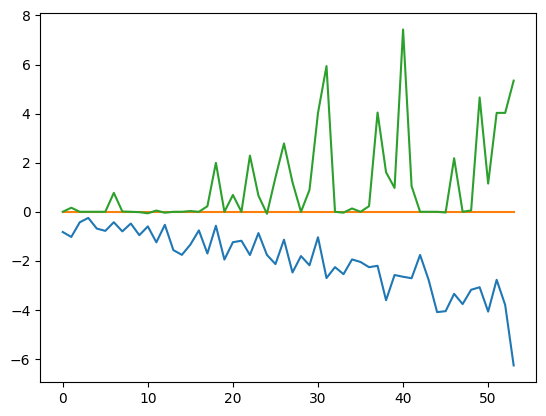

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history)

should point out that bad_loss (target) is explosive; loss is calculated by how bad it is at identifying frogs, then that loss is used to make model worse, which makes loss worse, etc etc. there should be control over this explosiveness - KL is convergent, so maybe ensuring that both are around the same ballpark with a time-delineated weighting system could be cool. idk

In [ ]:
t_seen = [accuracy0_t_seen, accuracy1_t_seen, accuracy2_t_seen]
t_unseen = [accuracy0_t_unseen, accuracy1_t_unseen, accuracy2_t_unseen]
s_seen = [accuracy0_s_seen, accuracy1_s_seen, accuracy2_s_seen]
s_unseen = [accuracy0_s_unseen, accuracy1_s_unseen, accuracy2_s_unseen]

t_seen

[0.0, 0.5830000042915344, 0.00559999980032444]